# Basic Image Data Analysis Using Numpy and OpenCV – Part 1

*Accessing the internal component of digital images using Python packages becomes more convenient to understand its properties as well as nature.*

![](https://www.kdnuggets.com/wp-content/uploads/image-data-analysis.jpg)

## Introduction: A Little Bit About Pixel
Computer store images as a mosaic of tiny squares. This is like the ancient art form of tile mosaic, or the melting bead kits kids play with today. Now, if these square tiles are too big, it’s then hard to make smooth edges and curves. The more and smaller tiles we use, the smoother or as we say less pixelated, image will be. These sometimes gets referred to as resolution of the images.

Vector graphics are somewhat different method of storing images that aims to avoid pixel related issues. But even vector images, in the end, are displayed as a mosaic of pixels. The word pixel means a **picture element**. A simple way to describe each pixel is using a combination of three colors, namely **Red, Green, Blue**. This is what we call an **RGB** image.

In an RGB image, each pixel is represented by three **8 bit** numbers associated to the values for **Red, Green, Blue** respectively. Eventually using a magnifying glass, if we zoom a picture, we’ll see the picture is made up of tiny dots of little light or more specifically the pixels and what more interesting is to see that those tiny dots of little light are actually multiple tiny dots of little light of different colors which are nothing but **Red, Green, Blue** channels.

Pixel together from far away, create an image and upfront they’re just little lights that are **ON and OFF**. The combination of those create images and basically what we see on screen every single day.

Every photograph, in digital form, is made up of pixels. They are the smallest unit of information that makes up a picture. Usually round or square, they are typically arranged in a 2-dimensional grid.

Now, if all three values are at full intensity, that means they’re 255, it then shows as white and if all three colors are muted, or has the value of 0, the color shows as black. The combination of these three will, in turn, give us a specific shade of the pixel color. Since each number is an **8-bit** number, the values range from 0-255.

![](https://www.kdnuggets.com/wp-content/uploads/green-rgb.png)

Combination of these three color will possess tends to the highest value among them. Since each value can have 256 different intensity or brightness value, it makes **16.8** million total shades.

Here, we'll observe some following stuffs which is very basic fundamental image data analysis with Numpy and some concern Python packages, like `imageio , matplotlib` etc.


* **Importing images and observe its properties**
* **Splitting the layers**
* **Grey scale**
* **Using Logical Operator on pixel values**
* **Masking using Logical Operator**
* **Satellite Image Data Analysis**

## Importing an Image

Now let’s load an image and observe its various properties in general.

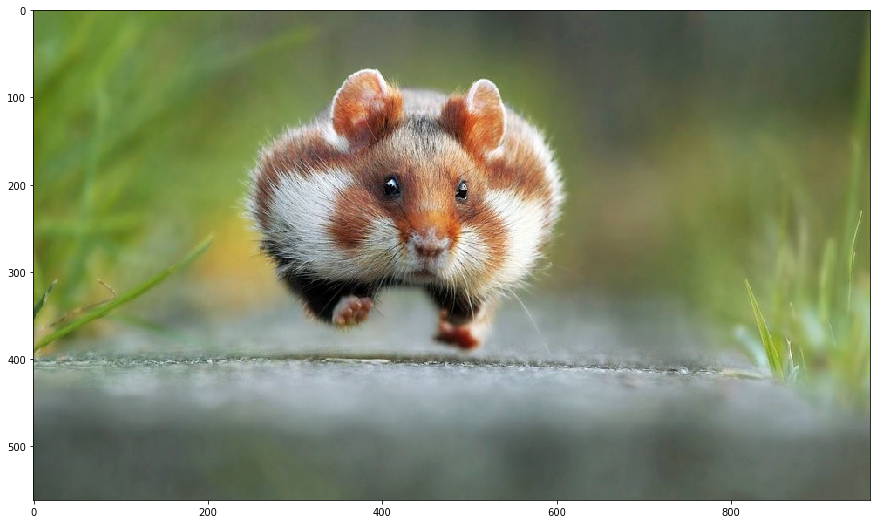

In [1]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

pic=imageio.imread('demo_2.jpg')
plt.figure(figsize=(15,15))

plt.imshow(pic)

## Observe Basic Properties of Image

In [2]:
print('Type of the image : ',type(pic))
print()
print('Shape of the image : {}'.format(pic.shape))
print('Image Hight {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'imageio.core.util.Array'>

Shape of the image : (562, 960, 3)
Image Hight 562
Image Width 960
Dimension of Image 3


The shape of the ndarray is a three layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for the three layers: **Red, Green, Blue**. So, if we calculate the size of a RGB image, the total size will be counted as **height x width x 3**

In [3]:
print('Image size {}'.format(pic.size))

print('Maximum RGB value in this image {}'.format(pic.max()))

print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 1618560
Maximum RGB value in this image 255
Minimum RGB value in this image 0


These values are important to verify since the eight-bit color intensity is, cannot be outside of the 0 to 255 range.

Now, using the picture assigned variable we can also access any particular pixel value of an image and further can access each **RGB** channel separately.

In [4]:
'''

Let's pick a specific pixel located at 100 th Rows and 50 th Column. 

And view the RGB value gradually. 

'''

pic[100, 50 ]

Array([109, 143,  46], dtype=uint8)

In these case: R = 109; G = 143 ; B = 46 and we can realize that this particular pixel has a lot of GREEN in it. And now we could have also selected one of this number specifically by giving the index value of these three channel. Now we know for this

* 0 index value for Red channel
* 1 index value for Green channel
* 2 index value for Blue channel

But good to know that in OpenCV, Images takes as not RGB but BGR. **imageio.imread** loads image as RGB (or RGBA), but OpenCV assumes the image to be [BGR or BGRA](https://docs.opencv.org/trunk/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce) (BGR is the default OpenCV colour format).

In [5]:
# A specific pixel located at Row : 100 ; Column : 50 

# Each channel's value of it, gradually R , G , B

print('Value of only R channel {}'.format(pic[ 100, 50, 0]))

print('Value of only G channel {}'.format(pic[ 100, 50, 1]))

print('Value of only B channel {}'.format(pic[ 100, 50, 2]))

Value of only R channel 109
Value of only G channel 143
Value of only B channel 46


OK, now let’s take a quick view of each channels in the whole image.

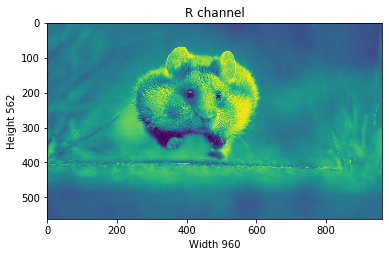

In [6]:
plt.title('R channel')

plt.ylabel('Height {}'.format(pic.shape[0]))

plt.xlabel('Width {}'.format(pic.shape[1]))

plt.imshow(pic[ : , : , 0])

plt.show()

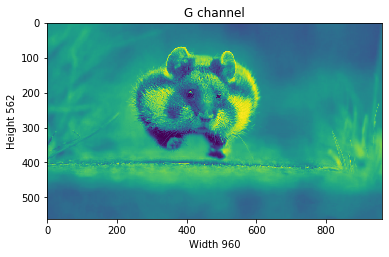

In [7]:
plt.title('G channel')

plt.ylabel('Height {}'.format(pic.shape[0]))

plt.xlabel('Width {}'.format(pic.shape[1]))

plt.imshow(pic[ : , : , 1])

plt.show()

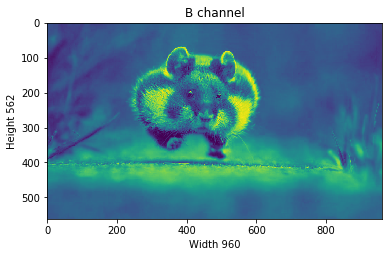

In [8]:
plt.title('B channel')

plt.ylabel('Height {}'.format(pic.shape[0]))

plt.xlabel('Width {}'.format(pic.shape[1]))

plt.imshow(pic[ : , : , 2])

plt.show()

Now, here we can also able to change the number of RGB values. As an example, let’s set the Red, Green, Blue layer for following Rows values to full intensity.

* R channel: Row- 100 to 110
* G channel: Row- 200 to 210
* B channel: Row- 300 to 310

We’ll load the image once, so that we can visualize each change simultaneously

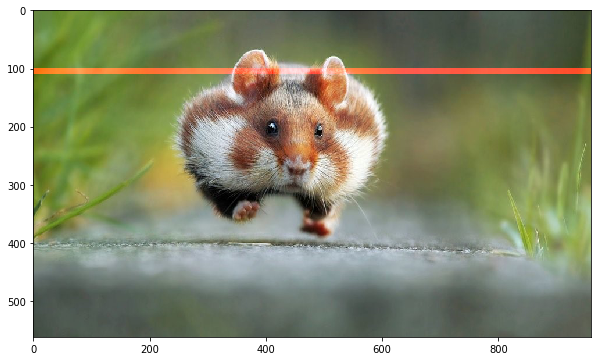

In [9]:
pic =imageio.imread('demo_2.jpg')

pic[100:110 , : , 0] =255# full intensity to those pixel's R channel

plt.figure( figsize= (10,10))

plt.imshow(pic)

plt.show()

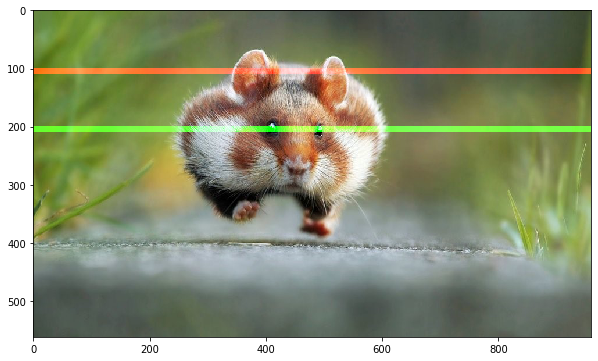

In [10]:
pic[200:210 , : , 1] =255# full intensity to those pixel's G channel

plt.figure( figsize= (10,10))

plt.imshow(pic)

plt.show()

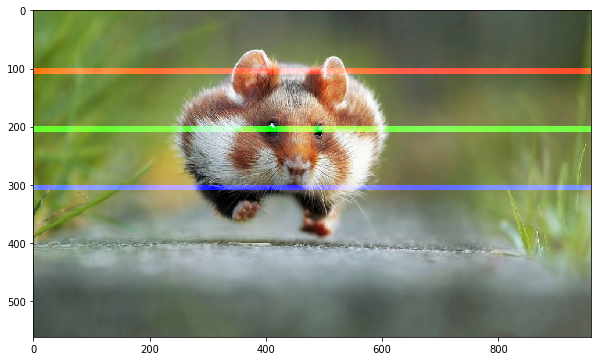

In [11]:
pic[300:310 , : , 2] =255# full intensity to those pixel's B channel

plt.figure( figsize= (10,10))

plt.imshow(pic)

plt.show()

To make it more clear let’s change the column section too and this time we’ll change the RGB channel simultaneously.

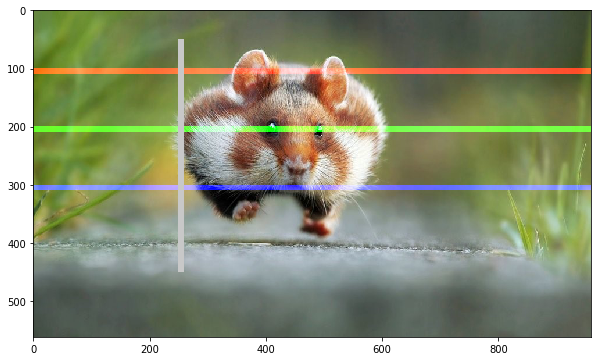

In [12]:
# set value 200 of all channels to those pixels which turns them to white

pic[50:450 , 250:260 , [0,1,2] ] =200

plt.figure( figsize= (10,10))

plt.imshow(pic)

plt.show()

## Splitting Layers

Now, we know that each pixel of the image is represented by three integers. Splitting the image into separate color components is just a matter of pulling out the correct slice of the image array.

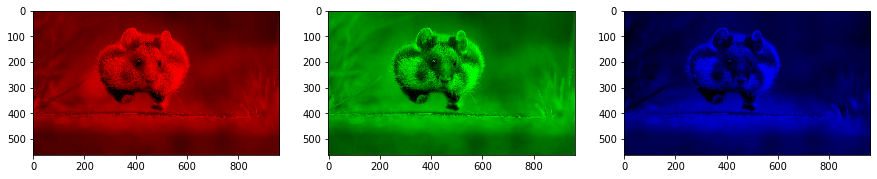

In [13]:
import numpy as np

pic=imageio.imread('demo_2.jpg') 

fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5)) 

for c,ax in zip(range(3),ax): 

    # create zero matrix
    split_img=np.zeros(pic.shape,dtype="uint8")# 'dtype' by default: 'numpy.float64' 

    # passing each channel
    split_img[:,:,c]=pic[:,:,c]

    # display each channel
    ax.imshow(split_img)

## Greyscale

Black and white images are stored in 2-Dimentional arrays. There’re two types of Black and White images:

* **Greyscale**: Ranges of shades of grey: 0 ~ 255
* **Binary**: Pixel are either black or white: 0 or 255

Now, Greyscaling is such process by which an image is converted from a full color to shades of grey. In image processing tools, for example: in OpenCV, many functions uses gray scale images before processing and this is done because it simplifies the image, acting almost as a noise reduction and increasing processing time as there’s less information in the images.

There are a couple of ways to do this in python to [convert image to grayscale](https://stackoverflow.com/a/45338831/9215780). But a straight forward way using matplotlib is to take the weighted mean of the RGB value of original image using [this](http://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale) formula.

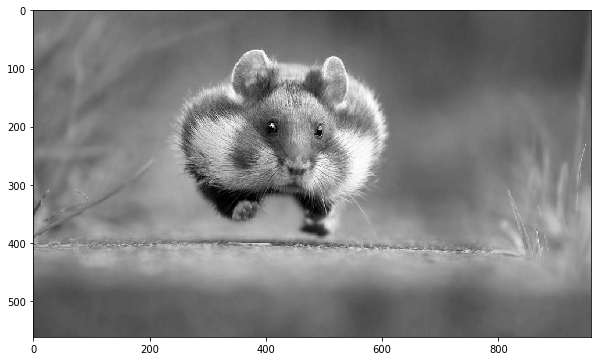

In [14]:
#Y' = 0.299 R + 0.587 G + 0.114 B
pic=imageio.imread('demo_2.jpg') 
gray= lambda rgb:np.dot(rgb[...,:3],[0.299,0.587,0.114])
gray=gray(pic) 
plt.figure(figsize=(10,10))
plt.imshow(gray,cmap=plt.get_cmap(name='gray'))
plt.show()

However, the [GIMP](https://docs.gimp.org/2.6/en/gimp-tool-desaturate.html) converting color to grayscale image software has three algorithms to do the task.

**Lightness** The graylevel will be calculated as
$$Lightness = ½ × (max(R,G,B) + min(R,G,B))$$

**Luminosity** The gray level will be calculated as 
$$Luminosity = 0.21 × R + 0.72 × G + 0.07 × B$$

**Average** The gray level will be calculated as
$$Average Brightness = (R + G + B) ÷ 3$$

Let’s give a try one of their algorithm, what about Luminosity.

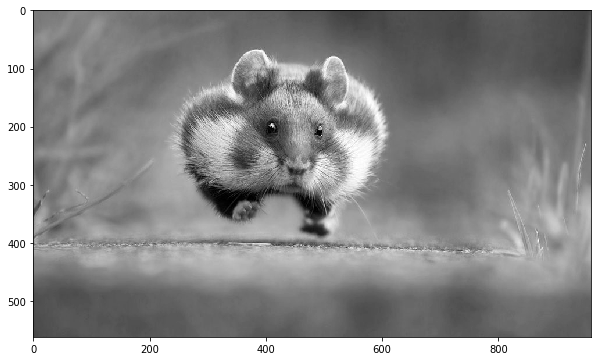

Type of the image :  <class 'imageio.core.util.Array'>

Shape of the image : (562, 960)
Image Hight 562
Image Width 960
Dimension of Image 2

Image size 539520
Maximum RGB value in this image 254.99999999999997
Minimum RGB value in this image 0.0
Random indexes [X,Y] : 129.07


In [15]:
pic=imageio.imread('demo_2.jpg') 

gray=lambda rgb:np.dot(rgb[...,:3],[0.21,0.72,0.07])

gray=gray(pic) 

plt.figure(figsize=(10,10))

plt.imshow(gray,cmap=plt.get_cmap(name='gray'))

plt.show() 

'''Let's take a quick overview some the changed properties now the color image.
Like we observe some properties of color image, 
same statements are applying now for gray scaled image.''' 

print('Type of the image : ',type(gray))

print() 

print('Shape of the image : {}'.format(gray.shape))

print('Image Hight {}'.format(gray.shape[0]))

print('Image Width {}'.format(gray.shape[1]))

print('Dimension of Image {}'.format(gray.ndim))

print() 

print('Image size {}'.format(gray.size))

print('Maximum RGB value in this image {}'.format(gray.max()))

print('Minimum RGB value in this image {}'.format(gray.min()))

print('Random indexes [X,Y] : {}'.format(gray[100,50]))

Here is [the second part](https://www.kdnuggets.com/2018/07/image-data-analysis-numpy-opencv-p2.html).